# importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

# feature scaling
## usually, machine learning regreesion include feature scaling automatically. but svm does not because it is not commonly used, thus we need to do it manually.

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1,1))

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting SVR to the dataset

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# predicting a new result

In [5]:
y_pred = regressor.predict(sc_X.transform(6.5))
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

# visualising the SVR result

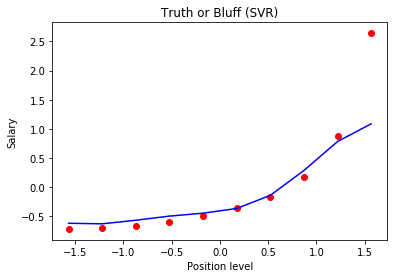

In [6]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

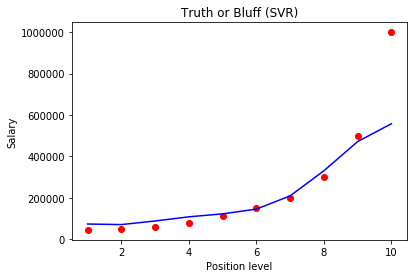

In [7]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# visualsing with a higher resolution and smoother curve

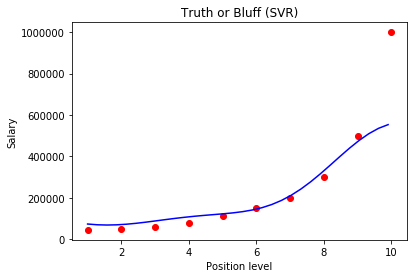

In [9]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(X_grid)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()